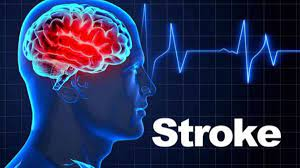

##<h2>**1) INTRODUCTION**</h2>














 *  In this notebook, we have attempted to highlight some key indicators called risk factors that lead to heart attacks.   The data comes from a wide range of age groups, gender, habits, and health problems. Their control is effective in preventing stroke and overall vascular risk.

*  **Problem Statement**

Visualize the relationships between various Healthy and Unhealthy habits to Heart Strokes, and there by predict the stroke probability with best model and hypertuned parameters.

1. Does age has impact on strokes? and How is this parameter distributed?
2. Does body mass index and glucose levels in a person, propel a heart stroke?
3. Assumption: Smoking can induce Stroke, is it true?
4. Assumption: Heart with a Heart Disease is prone to Stroke, is it true?
5. Assumption: Workload results in high blood pressure and that could lead to Stroke, is it true?
6. Assumption: Males are most susceptible to strokes due to high work related stress, is it true?

1.1) **We import all necessary modules**

In [917]:
import pandas as pd 
import seaborn as sns 
from scipy.stats import norm, skew
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
# pipeline method
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
# cross validation method 
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

1.2) **loading the dataset**


In [918]:
stroke=pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


##<h2>**2) OVERVIEW OF THE DATA**</h2>

In [919]:
stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [920]:
stroke.shape

(5110, 12)

there are 5110 rows and 12 columns

In [921]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


we have 5 categorical columns, and 7 numerical  :

categorical data:gender,ever_married, work_type, Residence_type, smoking_status 

numerical data: id,age,hypertension, heart_disease,avg_glucose_level,bmi(body mass index),stroke

for the column "bmi" there are less data than the other columns 




In [922]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


* the average age of our dataset is 43 years 
* the rate of hypertension is close to 10%.
* the rate of heart disease is close to 5%.
* the average body mass index is close to 29, which tells us that our population is overweight 
* almost 5% of our population has a stroke


In [923]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

 we have 201 missing values in the column "bmi", it will be necessary to remedy it
 
 

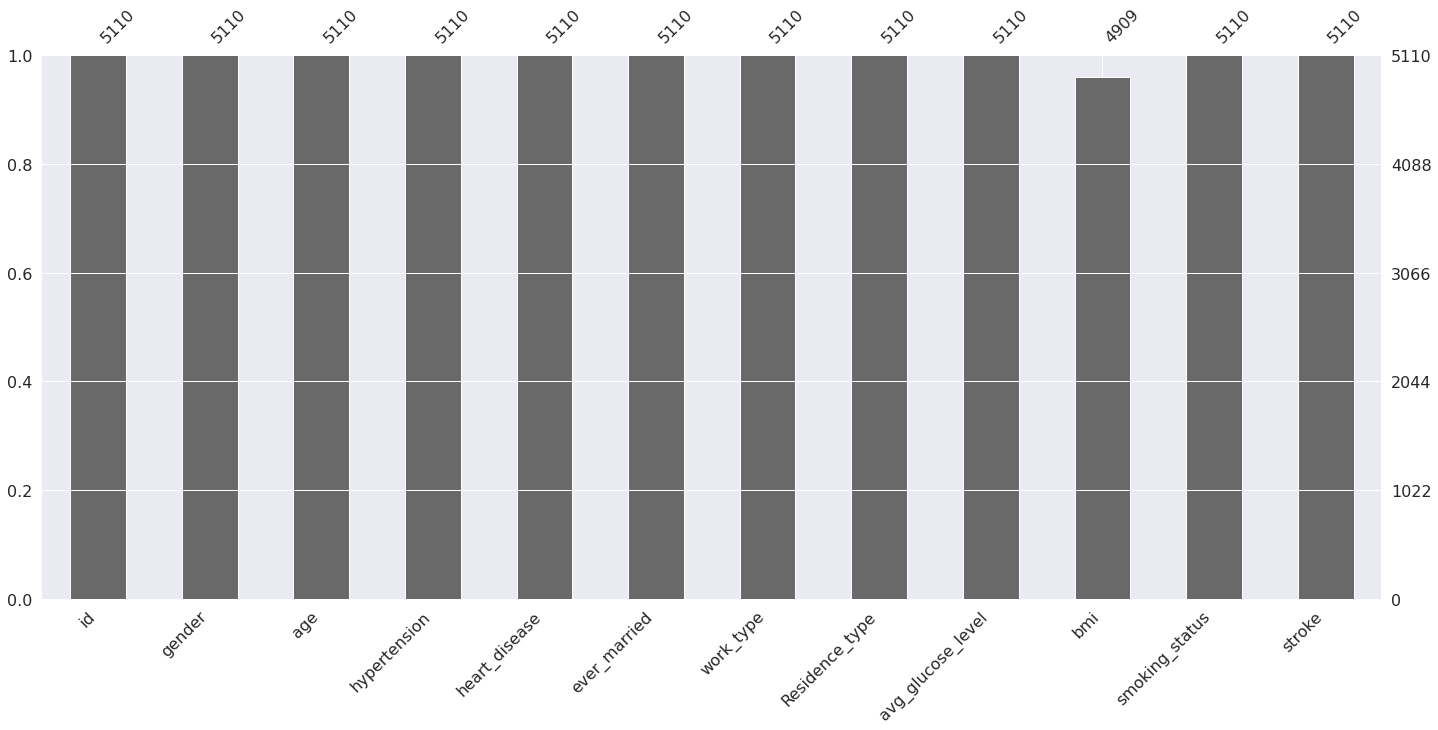

In [924]:
# Visualize the number of missing
msno.bar(stroke)



*   In the bmi column we notice that there are missing values, we will correct them soon 




##<h2>**3) DATA CLEANING**</h2>

In [925]:
unique_ids = len(set(stroke.id))
total_ids = stroke.shape[0]
print("There are " + str(total_ids - unique_ids) + " duplicate Ids in the dataset")

There are 0 duplicate Ids in the dataset


In [926]:
stroke=stroke.fillna(stroke[["bmi"]].mean())
stroke.isnull().sum().sum()

0

*   we have chosen to replace the missing values of the "bmi" column by the average of the "bmi". At present there are no missing values in our dataset

In [927]:
stroke.drop(['id'],axis=1,inplace=True)
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


*   We have deleted the columns that we do not need in our study.all other columns can influence a possible stroke


##<h2>**4) FEATURE ENCODING**</h2>

In [928]:
numeric_features = stroke.dtypes[stroke.dtypes != "object"].index
print(numeric_features)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')


In [929]:
categorical_features = stroke.dtypes[stroke.dtypes == "object"].index
print("categorical_features are :",categorical_features)

categorical_features are : Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


*  we will replace all string values by numerical values to be able to use them in the modeling

In [930]:
# male=1 female=0
# Married=1 not_married=0
# Urban=1 Rural=0
# Children=4 Self_employed=3 Private=2 Never_worked=1 Govt_job=0
# never smoked=2  Unknown=0  formerly smoked=1  smokes=3
encoder=LabelEncoder()
stroke["gender"]=encoder.fit_transform(stroke["gender"])
stroke["ever_married"]=encoder.fit_transform(stroke["ever_married"])
stroke["Residence_type"]=encoder.fit_transform(stroke["Residence_type"])
stroke["work_type"]=encoder.fit_transform(stroke["work_type"])
stroke["smoking_status"]=encoder.fit_transform(stroke["smoking_status"])
stroke.head() 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


##<h2>**5) EXPLORATORY DATA ANALYSIS**</h2>

**5.1) univariate analysis**

* **The target value distribution** 

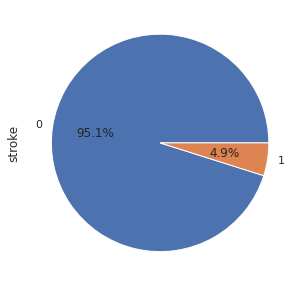

In [931]:
plt.figure(figsize=(8,5))
stroke['stroke'].value_counts().plot.pie(autopct="%1.1f%%")

*  5% of the sample has a stroke 

* **Feautures distribution**

    **i) categorical features**

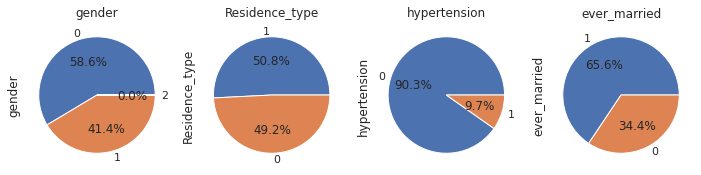

In [932]:
plt.figure(figsize=(12,15))
plt.subplot(1,4,1)
stroke["gender"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("gender")
plt.subplot(1,4,2)
stroke["Residence_type"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Residence_type")
plt.subplot(1,4,3)
stroke["hypertension"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("hypertension")
plt.subplot(1,4,4)
stroke["ever_married"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("ever_married")

plt.show()

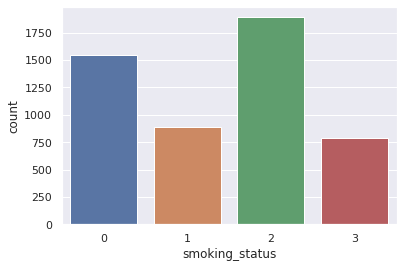

In [933]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="smoking_status", data=stroke)

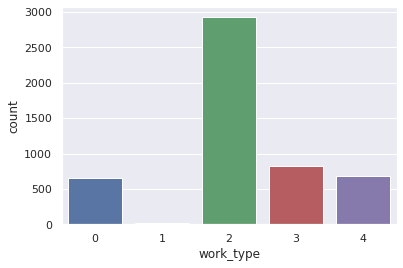

In [934]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="work_type", data=stroke)

  **ii) numerical features**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


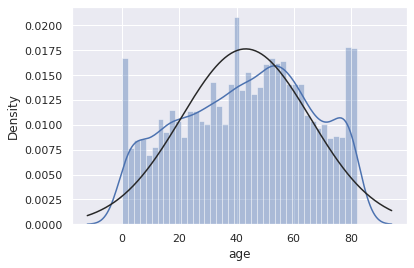

In [935]:
sns.distplot(stroke["age"], bins=  40, fit=norm)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


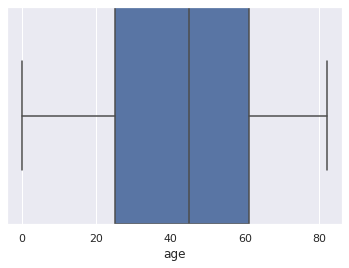

In [936]:
sns.boxplot(stroke["age"],width=1)

*   Maximum=80

*   Minimum=0

*   Median=45

*   Q1=24

*   Q3=60

*   range=max-min= 80

*   Interquartile Range =Q3-Q1=60-24=36

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


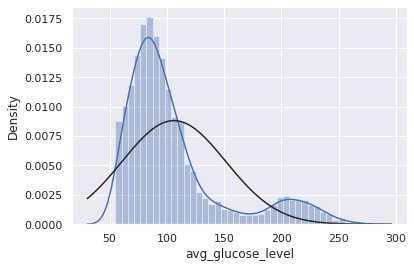

In [937]:
sns.distplot(stroke["avg_glucose_level"], bins=  40, fit=norm)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


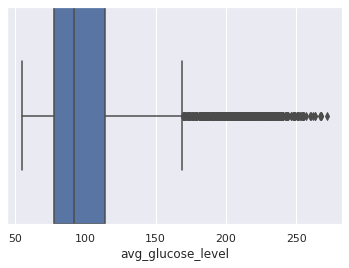

In [938]:
sns.boxplot(stroke["avg_glucose_level"],width=1)

*   we notice that there are a lot of outliers, i.e. a lot of people who have a very high glucose level (>170) compared to the norm

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


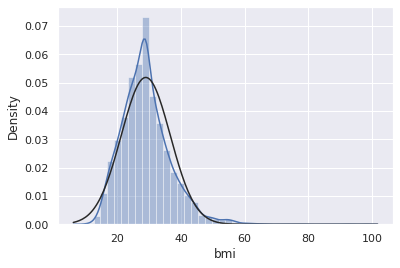

In [939]:
sns.distplot(stroke["bmi"], bins=  40, fit=norm)
plt.show()

**5.2) Multivariate analysis**

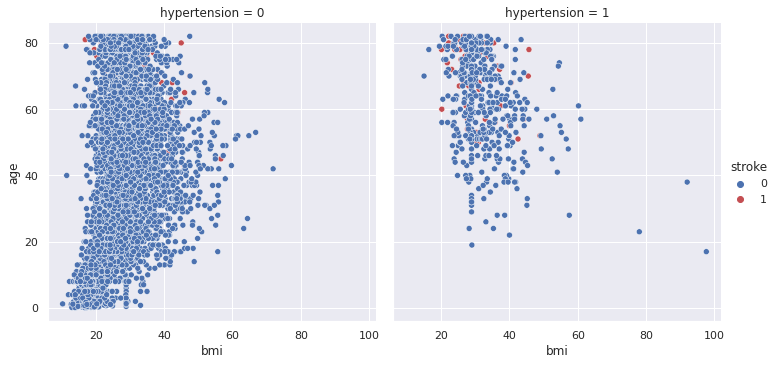

In [940]:
sns.relplot(
    data=stroke, x="bmi", y="age", col="hypertension",
    hue="stroke",
    palette=["b", "r"], sizes=(10, 100)
)

*  After a certain age (over 60 years) the risk of stroke increases even if the person is not hypertensive. If the person is hypertensive, the risk of stroke increases even more. 

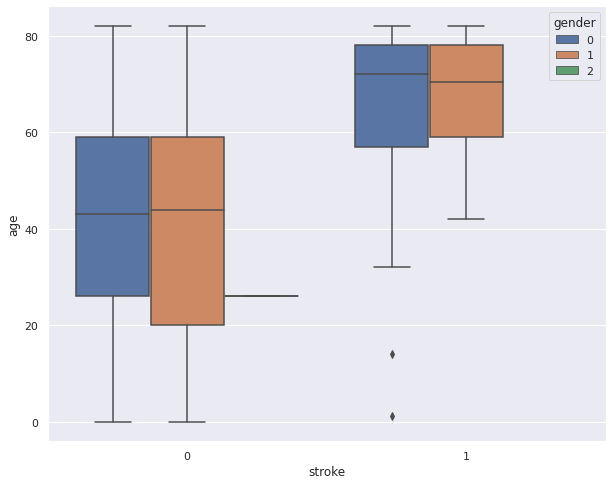

In [941]:
plt.figure(figsize=(10,8))
sns.boxplot(x='stroke',y='age',data=stroke,hue='gender')

* the risk of a stroke is clearly increased after a certain age 

* contrary to the belief, the risk of having a stroke is greater in women than in men 


**5.3) Total Correlations Between the Features**

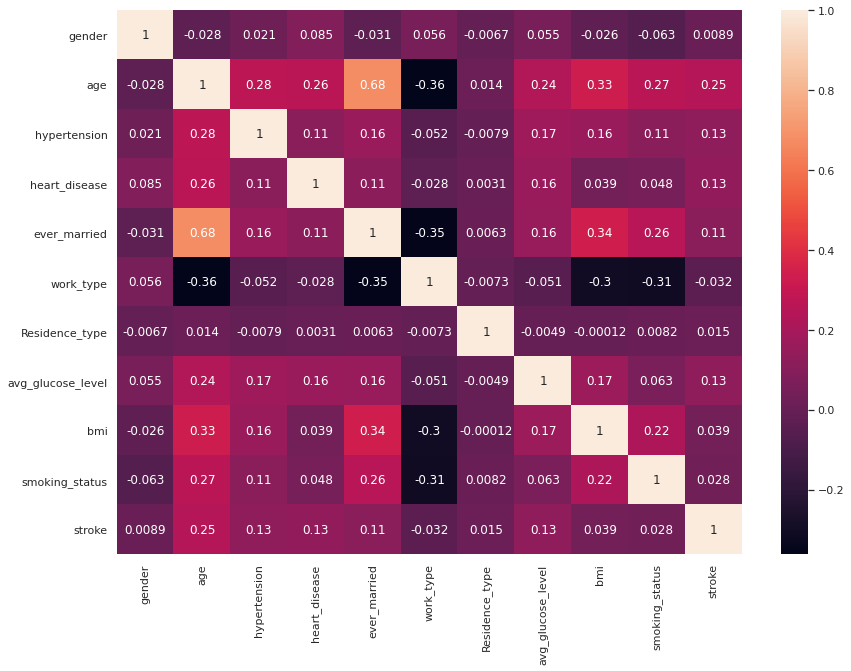

In [942]:
plt.figure(figsize=(14,10))
corr = stroke.corr()
sns.heatmap(corr, annot = True)

##<h2>**6) DATA MODELING**</h2>

*  In this study, we notice that we are facing supervised data since we have the output column which is "stroke". We therefore use the supervised learning algorithms 

* We use the pipeline method to compare different classification algorithms such as logistic regression, KNN, decision tree and random forest, so we can choose the algorithm with the best accuracy 

* Finally, we will use one of the cross validation methods (Kfold) for a possible improvement of our model

**6.1)  Feature selection**

In [943]:
x = stroke[['hypertension', 'gender','age','heart_disease','work_type','Residence_type','avg_glucose_level','bmi','smoking_status','ever_married']].values
y= stroke['stroke']

**6.2)  scaling the data**

In [944]:
scaler = StandardScaler()
inp_df = scaler.fit_transform(x)

**6.3)  Split the dataset into a training set and a testing set**

In [945]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

**6.4)  A machine learning pipeline using sklearn** 

In [946]:
# using standardscaler for data preprocessing 
# Logistic Regression 
pipeline_lr= Pipeline([('sc1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

# decision tree
pipeline_dt= Pipeline([('sc2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])

# Randomforest classifier 
pipeline_randomforest= Pipeline([('sc3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])
#KNN 
pipeline_KNN= Pipeline([('sc4',StandardScaler()),
                     ('pca24',PCA(n_components=2)),
                     ('KNN',KNeighborsClassifier())])

In [947]:
# Make the pipelines in a list 
my_pipelines = [pipeline_lr,pipeline_dt,pipeline_randomforest,pipeline_KNN]
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3:'KNN'}
# fit the piplines 
for pip in my_pipelines:
    pip.fit(x_train, y_train)

In [948]:
# Accuracy for each model 
def accuracy():
    for v,model in enumerate(my_pipelines):
        print("{} Test Accuracy is: {}".format(pipe_dict[v],model.score(x_test,y_test)))
accuracy()

Logistic Regression Test Accuracy is: 0.9549902152641878
Decision Tree Test Accuracy is: 0.9168297455968689
RandomForest Test Accuracy is: 0.952054794520548
KNN Test Accuracy is: 0.9510763209393346


In [949]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

# best model ocurracy 
for v,model in enumerate(my_pipelines):
    if model.score(x_test,y_test)>best_accuracy:
        best_accuracy=model.score(x_test,y_test)
        best_pipeline=model
        best_classifier= v
print('Classifier with best accuracy :{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy :Logistic Regression


**6.5)  Model Logistic regression**

In [950]:
logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**6.6)  Model evaluation**

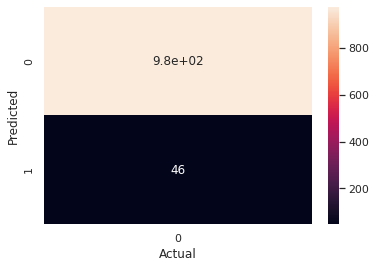

In [951]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Predicted'], colnames=['Actual'])
sns.heatmap(confusion_matrix, annot=True)

In [952]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       976
           1       0.00      0.00      0.00        46

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.95      0.93      1022



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [953]:
auc_score = roc_auc_score(y_test, y_pred)
print('auc_score is : ',auc_score)

auc_score is :  0.5


**6.7)  Improving the model**

In [954]:
kfold = KFold(n_splits=10, random_state=22,shuffle=True) # k=10, split the data into 10 equal parts
result_lr=cross_val_score(model,x,y,cv=10,scoring='accuracy')
print('The cross validated score for Logistic Regression is:',result_lr.mean())
y_pred = cross_val_predict(model,x,y,cv=10)

The cross validated score for Logistic Regression is: 0.9477495107632092


* finally, we obtained a better score with the train_test_split method than the cross validation method 